# Crisis medioambiental en Quintero y Puchuncaví: Análisis de egresos hospitalarios período 2002-2017
author: "Raimundo Becerra Parra, Javier Muñoz Carvajal, Juan Saez Hidalgo"


In [ ]:
knitr::opts_chunk$set(echo = TRUE)

## Introducción

Con el fin de mostrar de manera más explícita el problema al que se enfrenta la comuna de Quintero y Puchuncaví, junto con analizar los problemas que pueden venir a futuro, se utilizan herramientas de minería de datos para comparar distintos aspectos de las comunas con respecto a los datos a nivel país, inspirados por el paper Modeling to Predict Cases of Hantavirus Pulmonary Syndrome in Chile (Nsoesie, et al., 2014), que atribuye aumentos de temperatura al aumento del virus hanta, se espera encontrar una correlación entre la incidencia de enfermedades asociadas a contaminantes y la alta concentración de ciertos productos tóxicos en el aire de la zona.

Además se utilizarán indicadores epidemiológicos como el riesgo relativo para encontrar las enfermedades que más se escapan de la realidad nacional en Quintero y Puchuncaví.

## Contextualización del problema

El martes 21 de agosto tres colegios de la comuna de Quintero, Liceo Politécnico, Colegio Santa Filomena y Alonso de Quintero, fueron evacuados debido a que 30 alumnos presentaron síntomas atribuidos a una nube tóxica que afecto a la localidad de Loncura, Quintero y Ventanas (El Mostrador, 2018a). Dos días después se declara alerta amarilla en la zona debido a la presencia de una nube amarilla que afecta a gran parte de la población, colapsando los centros de atención primaria y llamando la atención a nivel nacional (El Mostrador, 2018b).

De ahí en adelante la sintomatología en la población no ha parado, y pese a la gravedad de la situación no es la primera vez que las comunas de Quintero y Puchuncaví se enfrentan a una crisis medioambiental. Siendo alguno de ellos derrames de petróleo en la bahía de Loncura (Solis, 2014) (Manosalva & Obrador, 2016), el cierre de “aguas calientes” en Ventana (The Clinic, 2012) y las muchas quejas por la instalación de Ventanas de Codelco, en ese entonces Enami (Núñez & Olguín, 2018).

El objetivo de este proyecto es, mediante el análisis de datos públicos como los egresos hospitalarios (de 2001 a 2017) (Minsal, 2017), la interpolación de datos demográficos de la INE y el censo (2002 a 2030) (Instituto Nacional de Estadísticas, 2014) y los datos de contaminación por comuna (2009 a 2015) (Ministerio del Medio Ambiente, 2018), evidenciar el daño (o la ausencia de éste) en el mediano plazo en las comunas de Quintero y Puchuncaví.

La historia de Quintero y Puchuncaví nos muestra como la zona lleva un largo transcurso de contaminación ambiental. La termoeléctrica de Ventana, propiedad de la empresa estatal Chilectra, se instala en el año 1958, y la Fundición Ventanas, de en ese entonces ENAMI, en 1964. Ambas empresas, parte de un complejo industrial que ha crecido en los últimos años, han generado un gran impacto ambiental reconocido en el año 1992. Lo cual ha generado cambios en el protocolo de fiscalización ambiental (1992, 1994, 1995, 1998, 1999, 2001, 20002, 2011 y 2016) tanto local como nacional (Pras: Progrma para la Recuperación Ambiental y Social, 2016). La continua instalación de centrales de fundición y refinería, y el largo tiempo que esto ha ocurrido, hacen difícil de realizar un análisis de los efectos de la zona industrial. Por ello, solo se realiza un análisis del período que se encuentran datos para análisis (2002-2017).

## Hipótesis
Teniendo en cuenta lo expuesto anteriormente, se plantea la siguiente hipótesis: Existe correlación entre las enfermedades que más afectan a la comunidad de Quintero y Puchuncaví y la contaminación presente en la zona.

## Datos a utilizar

Para el presente análisis se utilizan los datos de egresos hospitalarios desde el año 2002 al año 2017 dados por el Departamento de Estadísticas e Información de Salud (2017), los cuales dan cuenta de el establecimiento, la comuna, la región, el diagóstico del egreso según la Clasificación Internacional de Enfermedades 10.ª edición (CIE-10), entre otros atributos. Se trabajará también con los datos de la proyección de población entre 2002 al 2020 dado por el Instituto Nacional de Estadísticas (2014), separados por comuna y sexo. Por último, se utilizan los datos del Sistema de Información Nacional de Calidad del Aire (2018), específicamente los índices de concentración de dióxido de azufre (SO2) y material particulado respirable con diámetro menor o igual a 10 $\mu$m (MP10) registrados anualmente en estaciones de monitoreo en las comunas de Quintero y Puchuncaví, entre 1993 y 2018.

## Análisis exploratorio de los datos

### Preliminares

Para analizar los datos se utilizarán conceptos prestados de la epidemiología, disciplina que se encarga de estudiar la distribución de las enfermedades en la población y los factores que influyen en tal distribución. Primero se definirá la  **tasa de incidencia** o simplemente incidencia de una enfermedad como "el número de casos nuevos que ocurren en un período de tiempo específico en una población en riesgo de contraer la enfermedad" (Gordis, 2014, p. 41). 

Si bien los egresos hospitalarios no dan cuenta completamente de los nuevos casos de una enfermedad, pues los casos de gente hospitalizada por una enfermedad tiende a ser mucho menor que los casos de gente con la enfermedad en sí, como el objetivo de este estudio no es realizar un estudio epidemiológico riguroso, se considerará el número de egresos hospitalarios en un año para una enfermedad dada como "el número de casos nuevos en un período de tiempo específico" (siendo el período de tiempo específico un año) y por lo tanto, en cuanto a este análisis concierne, podrán serán usados para calcular la incidencia de la enfermedad.

Con el objetivo de aplicar el concepto al estudio en cuestión, se define $\mathcal{A}=\{2002,...,2017\}$ como el conjunto de los años en estudio y $\mathcal{D}$ el conjunto de los posibles diagnósticos dados por el CIE-10, se tiene entonces que para $a \in \mathcal{A}$ y $d \in \mathcal{D}$, se define la tasa de incidencia del diagnóstico $d$, en el año $a$ y para una población cualquiera $\mathcal{X}$,  $\text{I}_{(a,d)}(\mathcal{X})$, como: 

$$\text{I}_{(a,d)}(\mathcal{X})=\frac{\text{N}_{(a,d)}(\mathcal{X})}{\text{P}_{a}(\mathcal{X})}$$

Para estudiar qué tan fuerte es la asociación entre la exposición a cierto factor ambiental y el desarollo de una enfermedad, se seleccionan dos poblaciones, $\mathcal{X}$ y $\mathcal{X}_{0}$, donde la primera está expuesta a tal factor ambiental y la segunda no, y se define el **riesgo relativo** como el cociente entre la incidencia de la enfermedad en la primera población y la incidencia de la enfermedad en la segunda (Gordis, 2014, p. 218).  Por lo tanto, en el contexto del presente análisis, para un año $a$ y un diagnóstico $d$, se definirá el riesgo relativo $\text{RR}_{(a,d)}(\mathcal{X},\mathcal{X}_{0})$ entre la población expuesta, $\mathcal{X}$, y la no expuesta, $\mathcal{X}_{0}$ como:

$$
\text{RR}_{(a,d)}(\mathcal{X},\mathcal{X}_{0})=\frac{\text{I}_{(a,d)}(\mathcal{X})}{\text{I}_{(a,d)}(\mathcal{X}_{0})}
$$

### Análisis

Dado el dataset de egresesos hospitalarios, se contabilizó el número de casos para cada diagnóstico, comuna y año. Como se considera como población expuesta a las comunas de Quintero y Puchuncaví, y la población no expuesta como el resto del país, para obtener los riesgos relativos de cada diagnóstico, se deben calcular las incidencias de Quintero, de Puchuncaví y la del resto del país. Las primeras dos son fáciles de calcular, pues para cada diagnóstico y año basta dividir el número de casos por la población de Quintero o Puchuncaví, en el año correspondiente. Para calcular la incidencia del resto del país para cierto diagnóstico y un cierto año, se deben sumar los casos de todas las comunas del país, excepto Quintero y Puchuncaví, y dividir este número por la suma de las poblaciones de todas las comunas, excepto Quintero y Puchuncaví. De esta forma, se obtiene el **riesgo relativo nacional** de Quintero usando la fórmula de riesgo relativo recién expuesta y eligiendo $\mathcal{X} = \text{Quintero}$ y $\mathcal{X}_{0} = \text{Chile menos Quintero y Puchuncaví}$. Similarmente, se obtiene para Puchuncaví eligiendo $\mathcal{X} = \text{Puchuncaví}$. Promediando el riesgo relativo con respecto a los años, se pueden ordenar los diagnósticos de mayor a menor riesgo relativo nacional promedio. Seleccionando los 300 primeros diagnósticos con mayor riesgo relativo nacional promedio en Quintero y en Puchuncaví, y tomando la intersección de estos, se obtienen 46 diagnósticos, los 20 primeros (ordenando según el promedio entre Quintero y Puchuncaví) se muestran a continuación:

<center>

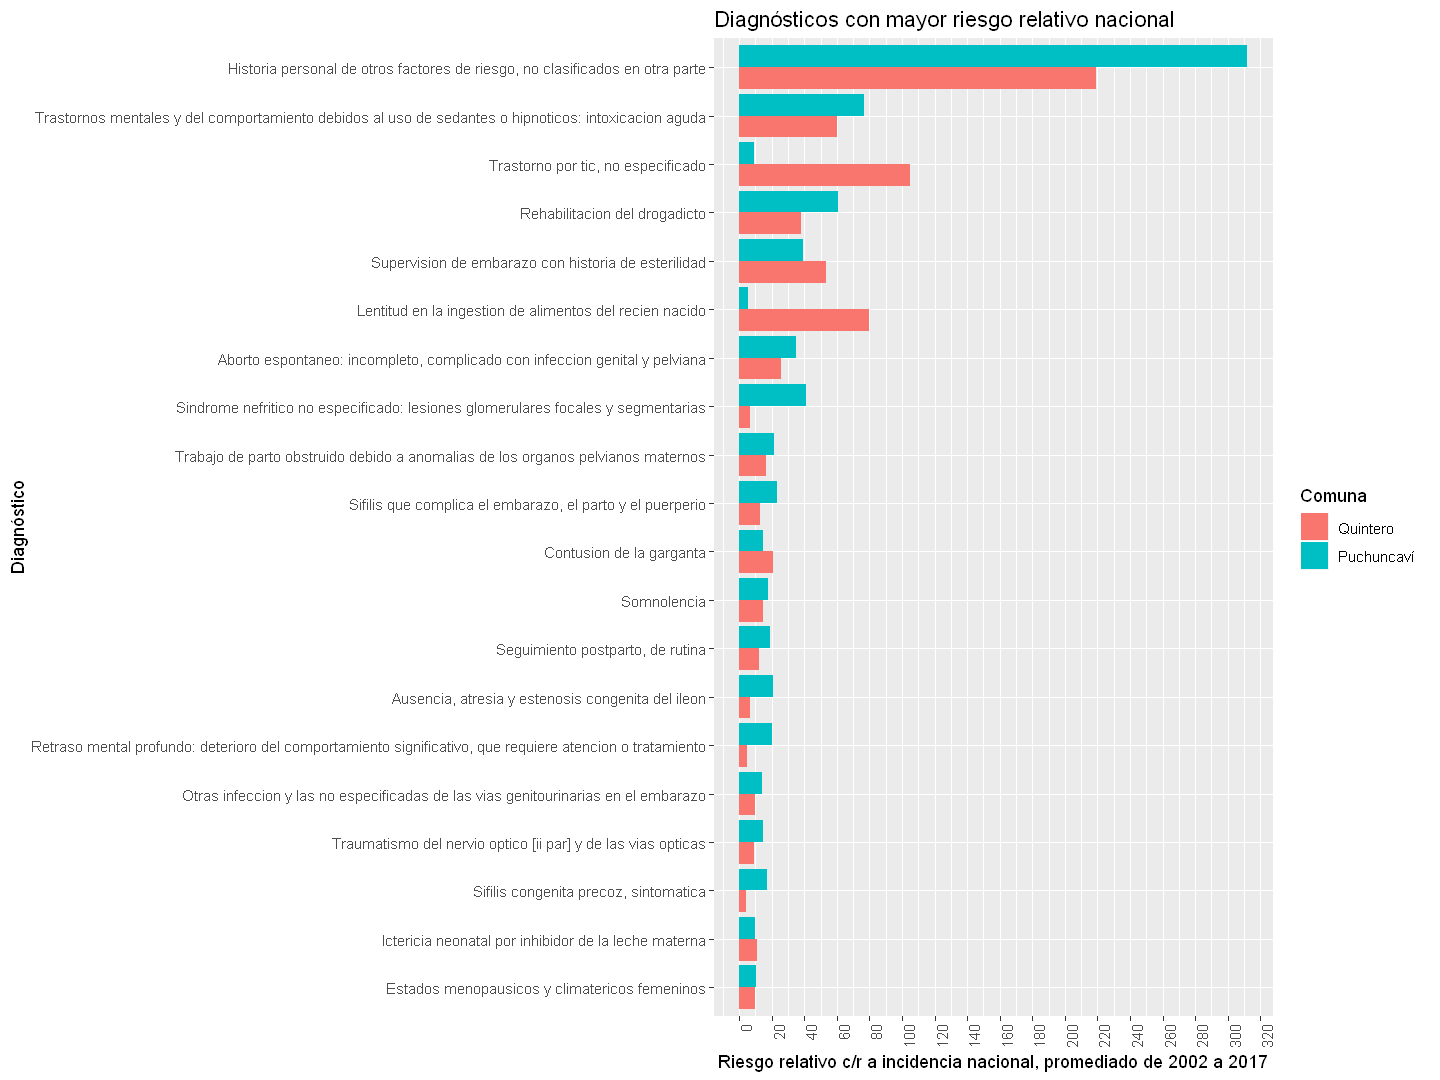

In [1]:
library(ggplot2)
library(reshape2)

library(repr)
options(repr.plot.width=12, repr.plot.height=9)

incidencia <- read.csv("datasets\\RRnacionalFinal.csv", header=TRUE)
is.na(incidencia) <- sapply(incidencia,is.infinite)

diagInteres <- intersect(incidencia[order(incidencia$meanQ, decreasing = T),][1:300,"id10"],incidencia[order(incidencia$meanP, decreasing = T),][1:300,"id10"])

incidenciaInt <- incidencia[incidencia$id10 %in% diagInteres,]
incidenciaInt <- incidenciaInt[order(incidenciaInt$mean, decreasing = T),][1:20,]

ggplot(melt(incidenciaInt[,c("meanQ","meanP","dec10","mean")], id.vars=c("mean","dec10")), aes(x=reorder(dec10, mean), y=value)) +   
  geom_bar(aes(fill = variable), position = "dodge", stat="identity") +
  coord_flip() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(fill="Comuna") +
  scale_fill_discrete(labels = c("Quintero","Puchuncaví")) +
  ggtitle("Diagnósticos con mayor riesgo relativo nacional") + 
  xlab("Diagnóstico") + ylab("Riesgo relativo c/r a incidencia nacional, promediado de 2002 a 2017")+
  scale_y_continuous(breaks = seq(0, 320, by = 20))

</center>

Es importante mencionar que un riesgo relativo $>1$ ya indica una asociación positiva entre la enfermedad y el factor ambiental al que la población en estudio está expuesta, e indica una posible causalidad (Gordis, 2014, p. 217). Es por esto que es muy interesante encontrar riesgos relativos nacionales tan altos, pues indican que existe una gran asociación entre los factores de riesgo presentes en Quintero y Puchuncaví, y los diagnósticos correspondientes. De este modo, se seleccionarán algunos de los diagnósticos con mayor riesgo relativo nacional para un mayor análisis, en particular, un análisis temporal. Tomando algunas de las enfermedades de la Figura 1, se graficarán sus incidencias año a año en Quintero, Puchuncaví y a nivel nacional (sin tener en cuenta a Quintero y Puchuncaví).
<center>

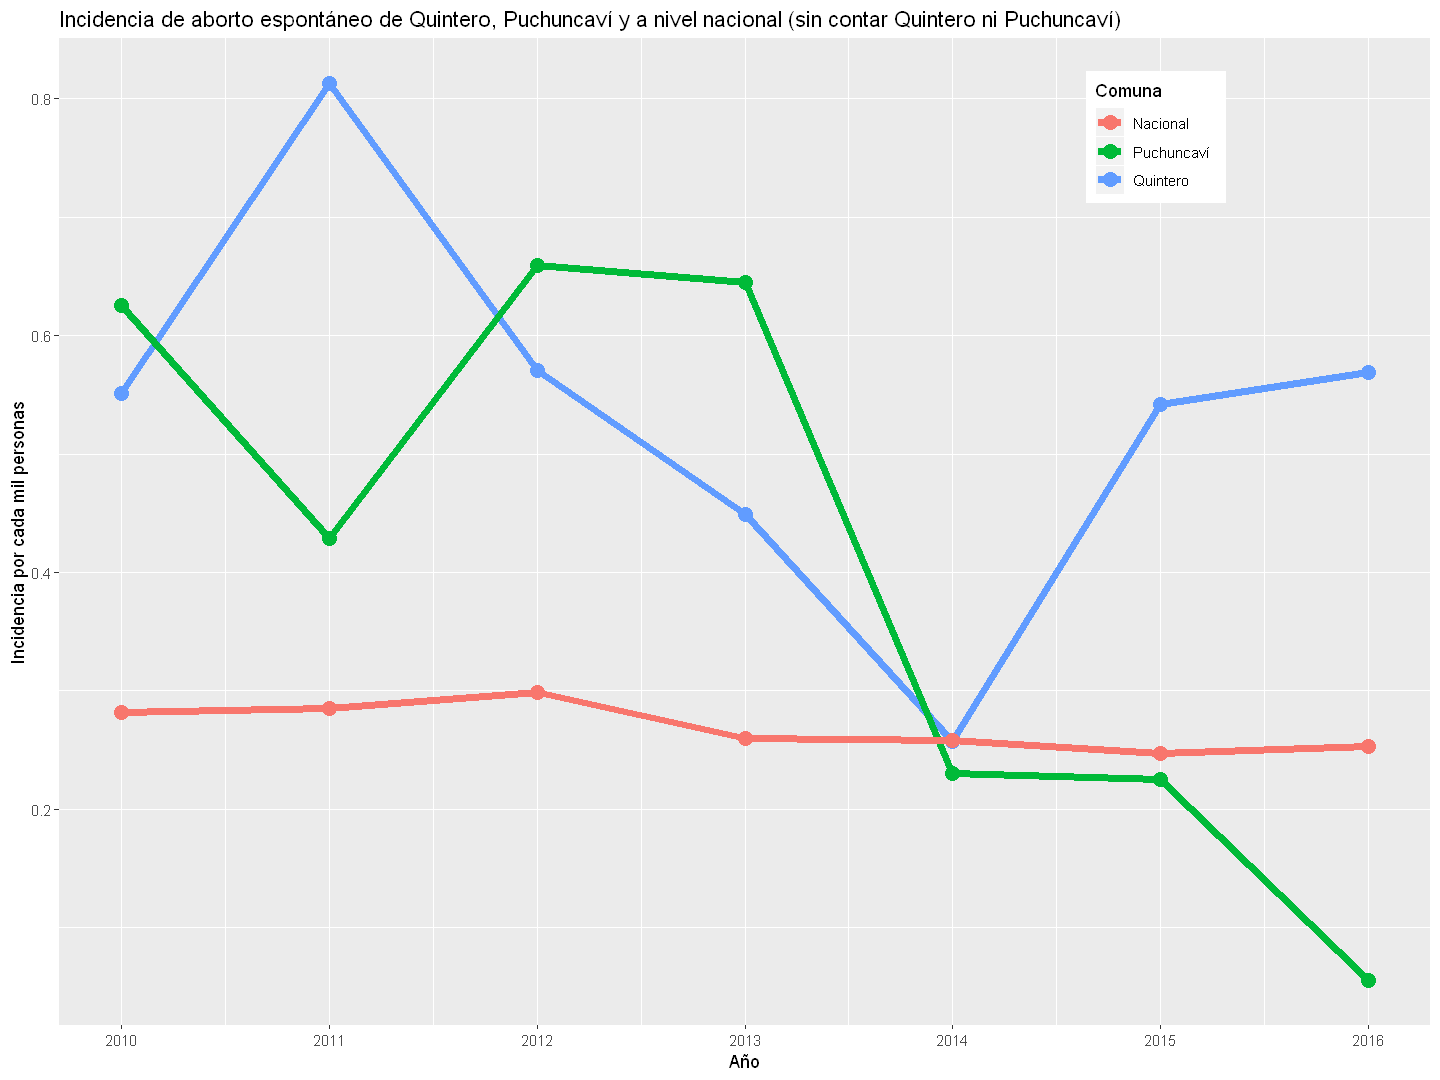

In [15]:
source("scripts\\abortoEspontaneo.R")
ggplot(d[10:nrow(d)-1,], aes(x = Fecha))+ 
geom_line(aes(y = IncidenciaQ*1000, colour = "Quintero"),size=2, na.rm=TRUE)+ 
  geom_point(aes(y = IncidenciaQ*1000, colour = "Quintero"),size=4, na.rm=TRUE)+
  geom_line(aes(y = Incidencia0*1000, colour = "Puchuncaví"),size=2, na.rm=TRUE)+
  geom_point(aes(y = Incidencia0*1000, colour = "Puchuncaví"),size=4, na.rm=TRUE)+
  geom_line(aes(y = IncidenciaN*1000, colour = "Nacional"),size=2, na.rm=TRUE)+ 
  geom_point(aes(y = IncidenciaN*1000, colour = "Nacional"),size=4, na.rm=TRUE)+
  labs(y = "Incidencia por cada mil personas",
       x = "Año",
       colour = "Comuna", size=25)+ 
  ggtitle("Incidencia de aborto espontáneo de Quintero, Puchuncaví y a nivel nacional (sin contar Quintero ni Puchuncaví)")+
  scale_x_continuous(breaks = d$Fecha)+ 
  theme(legend.position = c(0.8, 0.9))

</center>
En el gráfico anterior se observa que la incidencia de abortos espontáneos han estado consistentemente por sobre la incidencia nacional a través de los años. 

<center>

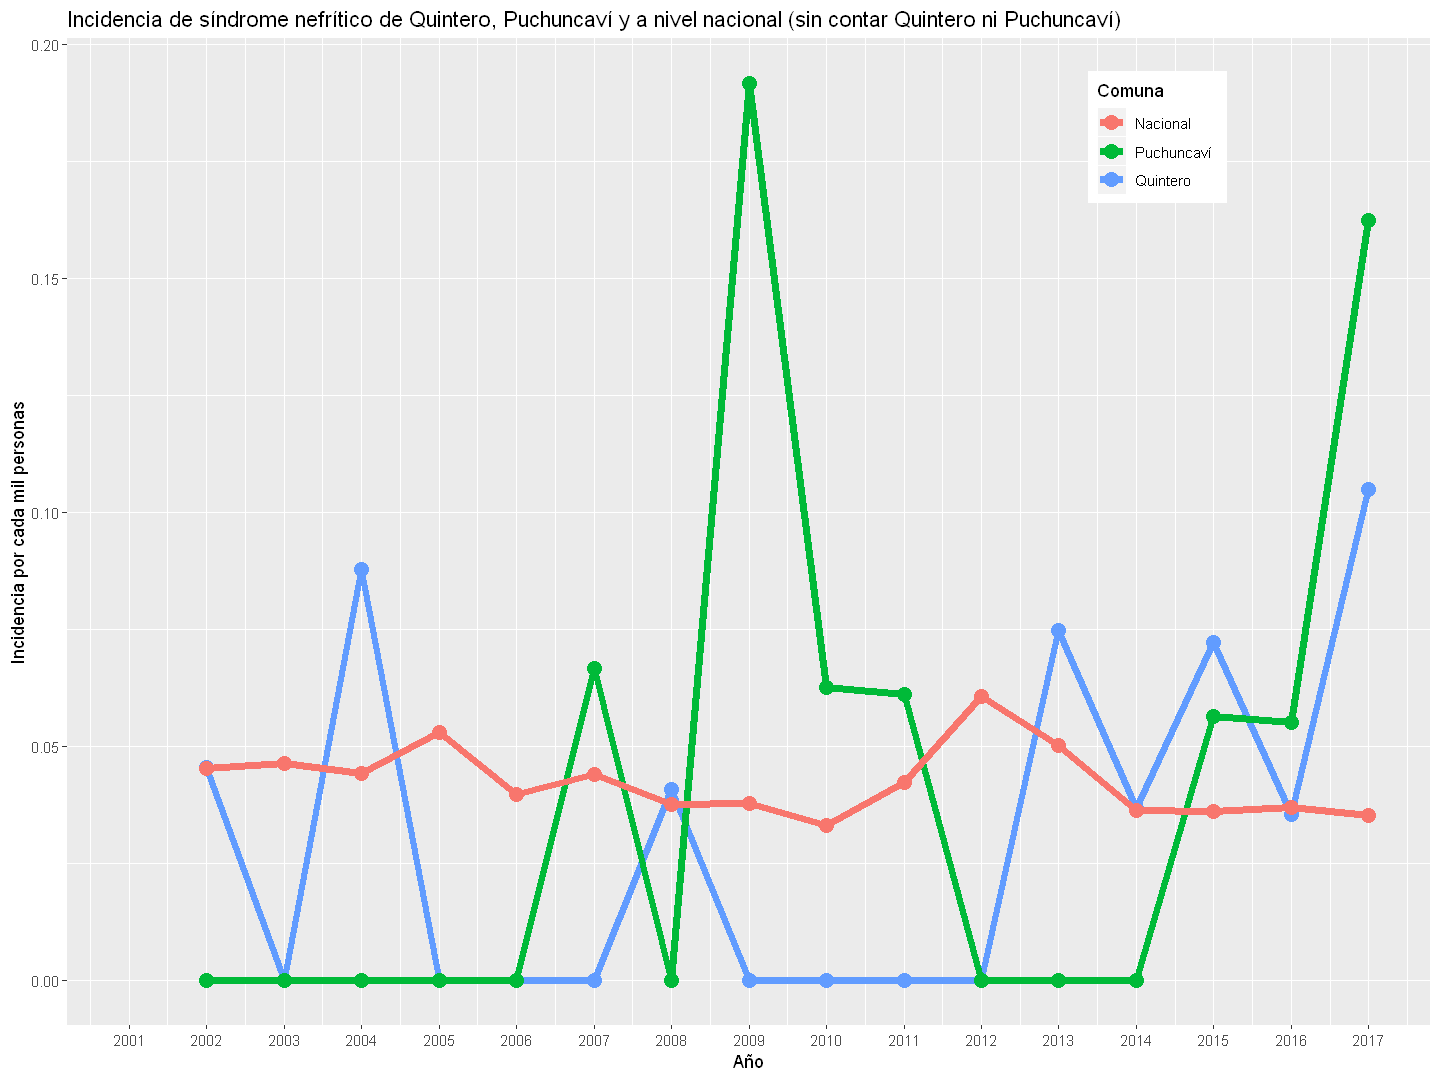

In [16]:
source("scripts\\paraplotearincidenciaporaño.R")
ggplot(d[10:nrow(d)-1,], aes(x = Fecha))+ 
  
  geom_line(aes(y = IncidenciaQ*1000, colour = "Quintero"),size=2, na.rm=TRUE)+ 
  geom_point(aes(y = IncidenciaQ*1000, colour = "Quintero"),size=4, na.rm=TRUE)+
  
  geom_line(aes(y = Incidencia0*1000, colour = "Puchuncaví"),size=2, na.rm=TRUE)+
  geom_point(aes(y = Incidencia0*1000, colour = "Puchuncaví"),size=4, na.rm=TRUE)+
  
  geom_line(aes(y = IncidenciaN*1000, colour = "Nacional"),size=2, na.rm=TRUE)+ 
  geom_point(aes(y = IncidenciaN*1000, colour = "Nacional"),size=4, na.rm=TRUE)+
  labs(y = "Incidencia por cada mil personas",
       x = "Año",
       colour = "Comuna", size=25)+ 
  ggtitle("Incidencia de síndrome nefrítico de Quintero, Puchuncaví y a nivel nacional (sin contar Quintero ni Puchuncaví)")+
  scale_x_continuous(breaks = d$Fecha)+ 
  theme(legend.position = c(0.8, 0.9))

</center>
En este gráfico se puede ver que la incidencia de síndrome nefrítico en Quintero y Puchuncaví superan la incidencia nacional ampliamente en algunos años (véase 2009 y 2017), por lo que se puede suponer cierta asociación entre factores de riesgo de Quinteros, pero especialmente Puchuncaví, y esta enfermedad.
<center>

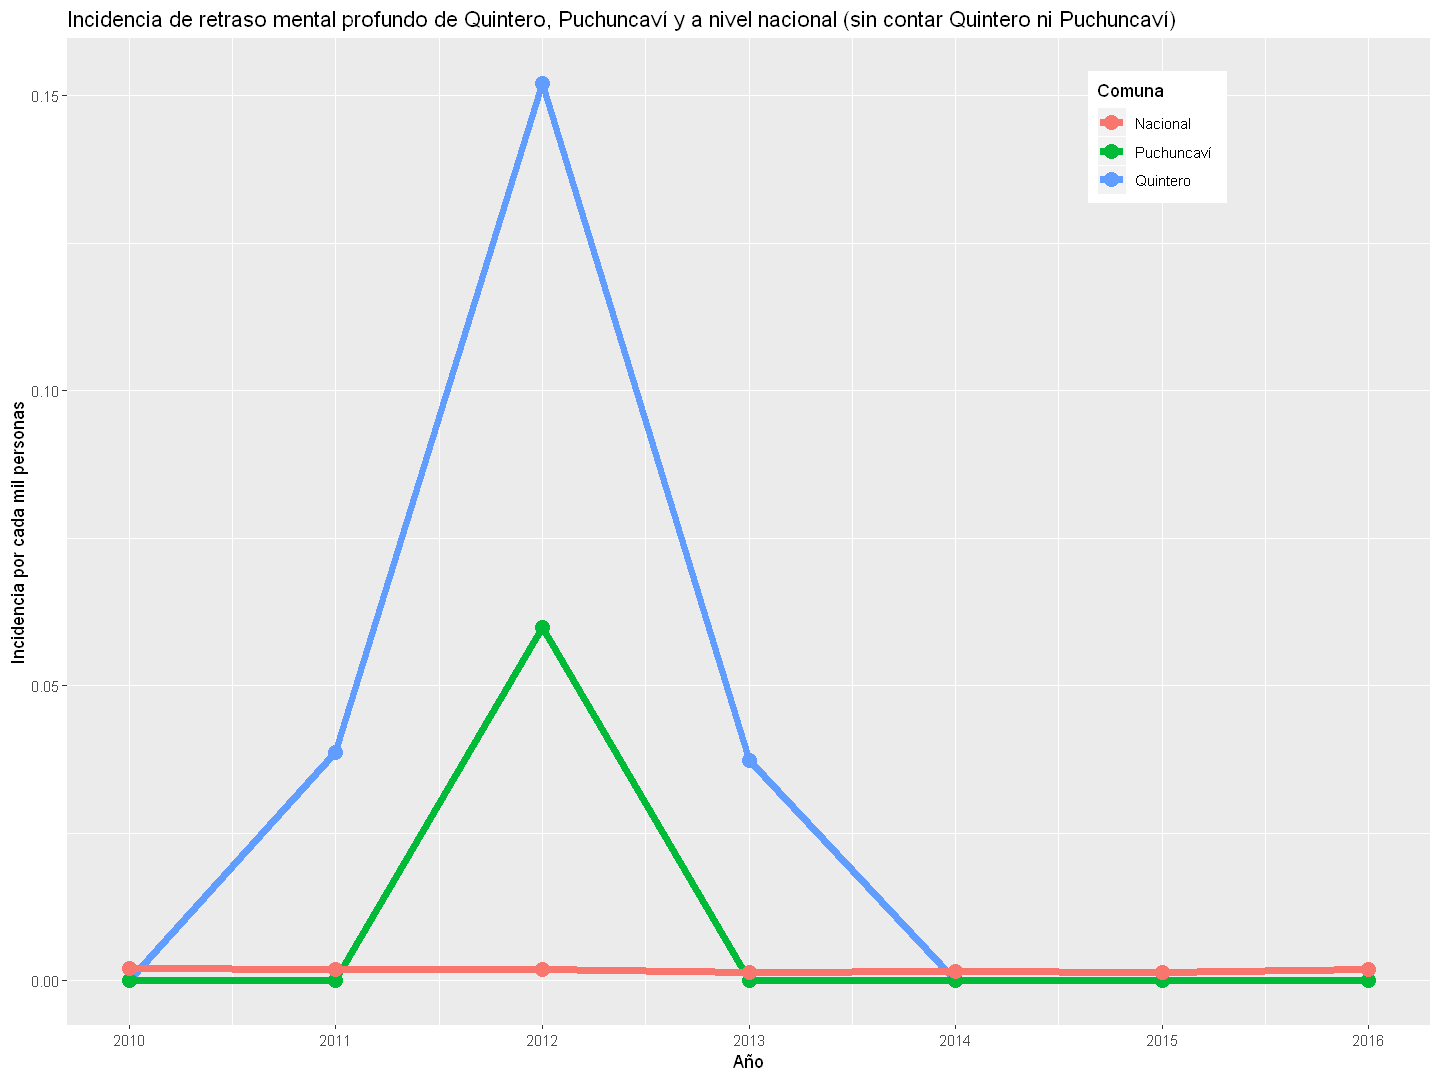

In [17]:
source("scripts\\retrasoMentalProfundo.R")
ggplot(d[10:nrow(d)-1,], aes(x = Fecha))+ 
  
  geom_line(aes(y = IncidenciaQ*1000, colour = "Quintero"),size=2, na.rm=TRUE)+ 
  geom_point(aes(y = IncidenciaQ*1000, colour = "Quintero"),size=4, na.rm=TRUE)+
  
  geom_line(aes(y = Incidencia0*1000, colour = "Puchuncaví"),size=2, na.rm=TRUE)+
  geom_point(aes(y = Incidencia0*1000, colour = "Puchuncaví"),size=4, na.rm=TRUE)+
  
  geom_line(aes(y = IncidenciaN*1000, colour = "Nacional"),size=2, na.rm=TRUE)+ 
  geom_point(aes(y = IncidenciaN*1000, colour = "Nacional"),size=4, na.rm=TRUE)+
  labs(y = "Incidencia por cada mil personas",
       x = "Año",
       colour = "Comuna", size=25)+ 
  ggtitle("Incidencia de retraso mental profundo de Quintero, Puchuncaví y a nivel nacional (sin contar Quintero ni Puchuncaví)")+
  scale_x_continuous(breaks = d$Fecha)+ 
  theme(legend.position = c(0.8, 0.9))

</center>
En el gráfico anterior se logra ver que la incidencia de casos de retraso mental profundo es casi nula todos los años excepto en el 2012, donde experimenta un peak tanto en Quintero y en Puchuncaví. Este peak no ocurre en la incidencia nacional, lo que indica una fuerte correlación entre los factores de riesgo de Quintero y Puchuncaví y el retraso mental profundo. Es importante mencionar que estos factores de riesgo no son necesariamente la contaminación, si no que estas comunas pueden tener muchos otros factores que hagan aumentar su incidencia en ciertas enfermedades.


En cuanto a los datos de la contaminación del aire provistos por el SINCA (2018), se obtienen los siguientes gráficos (donde no se tiene información en el año 2011 para Quintero): 
<center>

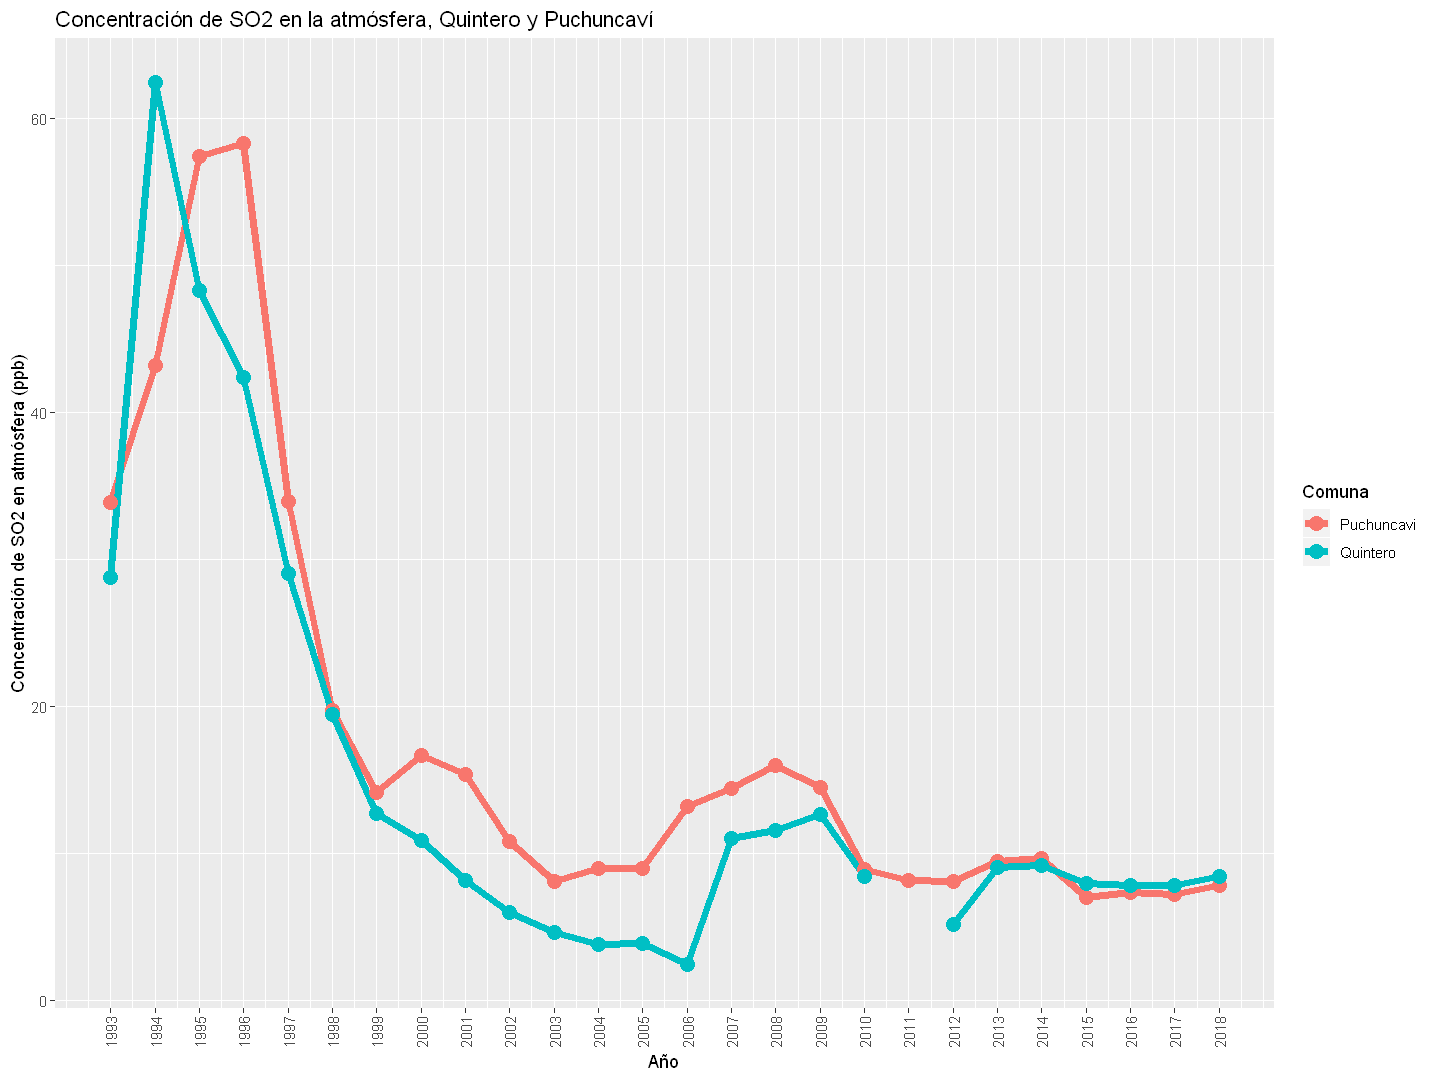

In [18]:
library(ggplot2)
library(reshape2)

source("scripts\\obtenerContaminacion.R")

QSO2 <- read.csv("datasets\\contaminacion\\QSO2.csv", header=TRUE)
QMP10 <-  read.csv("datasets\\contaminacion\\QMP10.csv", header=TRUE)
PSO2 <- read.csv("datasets\\contaminacion\\PSO2.csv", header=TRUE)
PMP10 <-  read.csv("datasets\\contaminacion\\PMP10.csv", header=TRUE)

SO2 <- data.frame(PSO2[,c("Fecha","mean")],QSO2[,"mean"])
colnames(SO2) <- c("Fecha","Puchuncavi","Quintero")

SO2long <- melt(SO2, id="Fecha")

colnames(SO2long)[2] <- "Comuna"

ggplot(data=SO2long,
       aes(x=Fecha, y=value, colour=Comuna)) +
  geom_line(size=2)+
  geom_point(size=4, na.rm=TRUE)+
  ggtitle("Concentración de SO2 en la atmósfera, Quintero y Puchuncaví") + 
  xlab("Año") + ylab("Concentración de SO2 en atmósfera (ppb)")+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5))+
  scale_x_continuous(breaks = SO2$Fecha)


MP10 <- data.frame(PMP10[,c("Fecha","mean")],QMP10[,"mean"])
colnames(MP10) <- c("Fecha","Puchuncavi","Quintero")

MP10long <- melt(MP10, id="Fecha")

colnames(MP10long)[2] <- "Comuna"

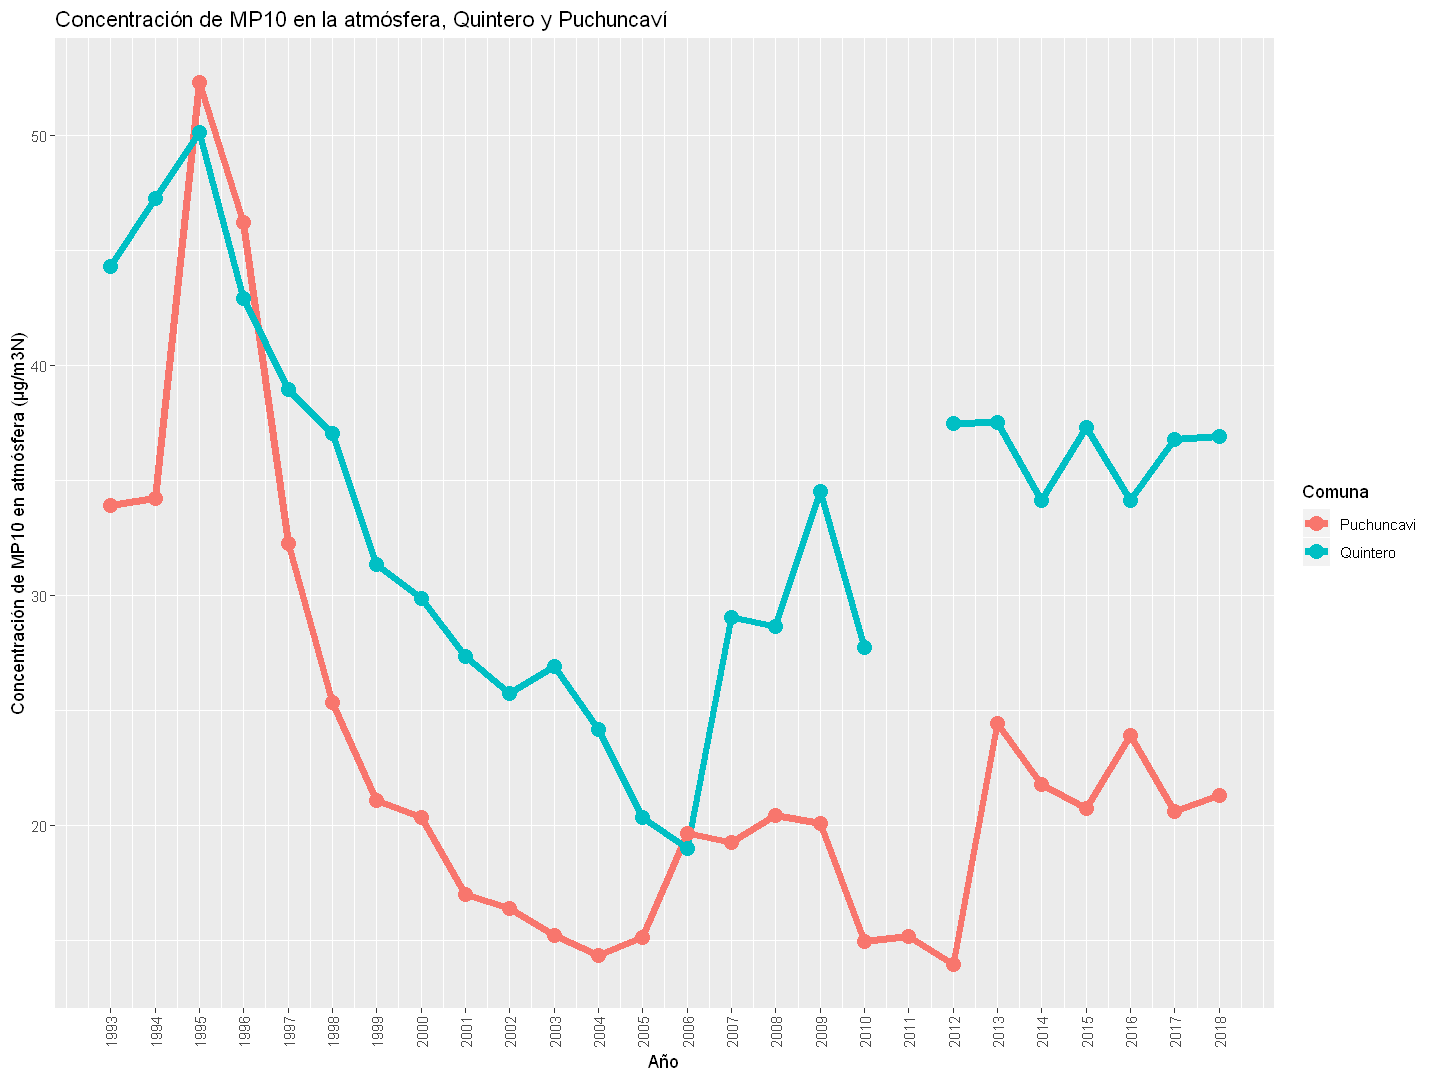

In [19]:
ggplot(data=MP10long,
       aes(x=Fecha, y=value, colour=Comuna)) +
  geom_line(size=2)+
  geom_point(size=4, na.rm=TRUE)+
  ggtitle("Concentración de MP10 en la atmósfera, Quintero y Puchuncaví") + 
  xlab("Año") + ylab("Concentración de MP10 en atmósfera (μg/m3N)")+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5))+
  scale_x_continuous(breaks = MP10$Fecha)

</center>

Se ve claramente un peak de ambas concentraciones y en ambas localidades alrededor del año 1995. También se nota que el MP10 en Quintero ha estado en aumento la última década, pero el resto de indicadores se han mantenido relativamente constantes en este mismo período en ambas localidades. Si bien a simple vista no se ve una correlación clara entre las incidencias de las enfermedades de las Figuras 2, 3 y 4 y las concentraciones de SO2 y MP10, con técnicas estadísticas más avanzadas podría ser posible establecer una correlación, pero esto se escapa de los objetivos del presente informe.

## Datos adicionales y segundo análisis
Luego del análisis exploratorio se encontraron nuevos datos que aportan a la investigación, estos son los datos de las estaciones de monitoreo de contaminación disponibles en Quintero y Puchuncaví recolectados por el SINAC. Estos datos ofrecen el nivel de contaminación registrado por cada estación de monitoreo mensualmente. Cabe mencionar que en ciertas estaciones hay muchos datos faltantes, por lo que fue necesario utilizar aproximaciones para estos datos, .
También se realizó un segundo análisis a los datos con los que ya se contaba y se decidió que en caso de trabajar con los egresos totales serían el total de egresos menos los egresos registrados como partos normales. Esto porque los casos de partos vienen siendo ruido a la investigación, ya que la contaminación no afecta directamente en la cantidad de partos normales. 


# Reformulación hipótesis
Considerando los nuevos datos disponibles se plantea una nueva hipótesis, que puede ser comprobada o rechazada con mayor certeza que la anterior al disponer de los nuevos datos. Esta hipótesis es: Dado un modelo predictivo para los egresos, agregarle contaminación como atributo mejora su capacidad predictiva.


## Uso de Dynamic Time Warping
Con el fin de trabajar con una porción que permita obtener información relevante de los egresos, se busca que esta porción tenga un comportamiento similar a la contaminación a evaluar. Para esto, se utiliza el algoritmo de Dynamic Time Warping para buscar similitud entre las curvas, ya sea en la actualidad o en el tiempo pasado, siendo este término de desfase el lag del que se hará mención más adelante.
Para esto primero se analizó el comportamiento de los egresos totales (sin partos como se comentó previamente) con respecto a distintos contaminantes:

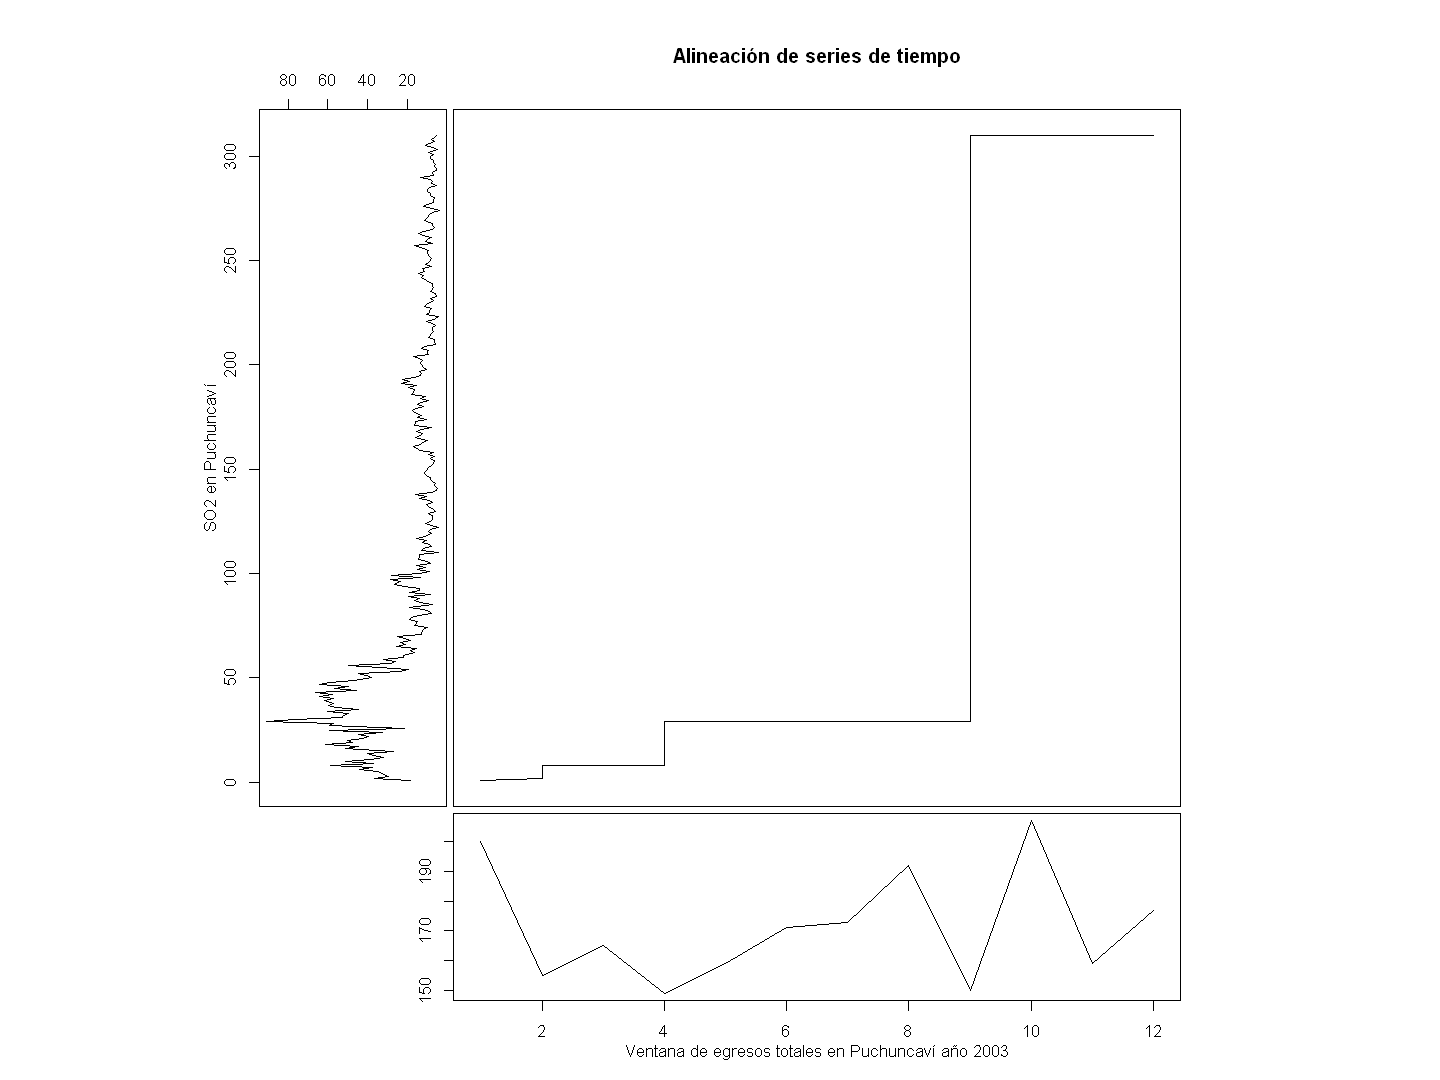

In [6]:
library(dtw);
library(imputeTS);

PSO2estacionpuch <- read.csv("datasets\\contaminacion\\puch\\mensual\\epuchuncaviMensualSO2.csv", header=TRUE,sep=";", na.strings=c("",NA),dec=",")
PSO2lagreda <- read.csv("datasets\\contaminacion\\puch\\mensual\\lagredaMensualSO2.csv", header=TRUE,sep=";", na.strings=c("",NA),dec=",")
PSO2maitenes <- read.csv("datasets\\contaminacion\\puch\\mensual\\losmaitenesMensualSO2.csv", header=TRUE,sep=";", na.strings=c("",NA),dec=",")
PSO2ventanas<- read.csv("datasets\\contaminacion\\puch\\mensual\\ventanasMensualSO2.csv", header=TRUE,sep=";", na.strings=c("",NA),dec=",")
PSO2campiche<- read.csv("datasets\\contaminacion\\puch\\mensual\\campicheMensualSO2.csv", header=TRUE,sep=";", na.strings=c("",NA),dec=",")

data0 <- PSO2estacionpuch[,c(1,3:5)]
colnames(data0) <- c("Fecha","Validado","Preliminar","NoValidado")
data0$Fecha <- seq(as.Date("1993/01/01"), as.Date("2018/10/01"), by = "month")
data0$estPuchuncavi <- rowMeans(data0[, c("Validado", "Preliminar","NoValidado")], na.rm=TRUE)
data0 <- data0[,c(1,5)]

data1 <- PSO2lagreda[,c(1,3:5)]
colnames(data1) <- c("Fecha","Validado","Preliminar","NoValidado")
data1$Fecha <- seq(as.Date("1993/01/01"), as.Date("2018/10/01"), by = "month")
data1$lagreda <- rowMeans(data1[, c("Validado", "Preliminar","NoValidado")], na.rm=TRUE)
data1 <- data1[,c(1,5)]

data2 <- PSO2maitenes[,c(1,3:5)]
colnames(data2) <- c("Fecha","Validado","Preliminar","NoValidado")
data2$Fecha <- seq(as.Date("1993/04/01"), as.Date("2018/10/01"), by = "month")
data2$maitenes <- rowMeans(data2[, c("Validado", "Preliminar","NoValidado")], na.rm=TRUE)
data2 <- data2[,c(1,5)]

data3 <- PSO2ventanas[,c(1,3:5)]
colnames(data3) <- c("Fecha","Validado","Preliminar","NoValidado")
data3$Fecha <- seq(as.Date("2013/01/01"), as.Date("2018/10/01"), by = "month")
data3$ventanas <- rowMeans(data3[, c("Validado", "Preliminar","NoValidado")], na.rm=TRUE)
data3 <- data3[,c(1,5)]

data4 <- PSO2campiche[,c(1,3:5)]
colnames(data4) <- c("Fecha","Validado","Preliminar","NoValidado")
data4$Fecha <- seq(as.Date("2013/01/01"), as.Date("2017/03/01"), by = "month")
data4$campiche <- rowMeans(data4[, c("Validado", "Preliminar","NoValidado")], na.rm=TRUE)
data4 <- data4[,c(1,5)]


PSO2 <- merge(data4,merge(data3,merge(merge(data0,data1,by="Fecha",all=T),data2,by="Fecha",all=T),by="Fecha",all=T),by="Fecha",all=T)

PSO2$mean <- rowMeans(PSO2[, 2:6], na.rm=TRUE)

tsPSO2 <- ts(PSO2$mean, start=c(1993,1), end=c(2018,10),frequency=12)

sinpartos <- read.csv("datasets\\time series\\PTotalSinPartosTS.csv");
x1 <- ts(sinpartos$amount,start=c(2001,1), end=c(2017,12),frequency=12);
x2 <- na.kalman(tsPSO2);
start<-c(2003,01);
end<-c(2003,12);
x1window <- window(x1,start,end);

alineacionxx<-dtw(x1window,x2,keep=TRUE);
plot(alineacionxx,type="threeway", main="Alineación de series de tiempo", xlab="Ventana de egresos totales en Puchuncaví año 2003", ylab="SO2 en Puchuncaví")

El código anterior ejemplifica cómo se generaron las time series de los contaminantes, en este caso, el SO2 registrado en Puchuncaví. Con estas time series, utilizando la librería dtw se genera la DTW que toma en cuenta la ventana de egresos a comparar (en el ejemplo se toman los egresos del año 2003) y los niveles de contaminación en Puchuncavi, obteniendo el gráfico que se observa en el centro de la imagen.
Así, se experimentó con distintos tamaños de ventana de egresos y tipos de contaminantes, obteniendo que la ventana con mayor semejanza en comportamiento es la que se muestra en la imagen, que se parece sobre todo al comienzo de la toma de muestras de SO2.

## Modelo ARIMA
Basados en el paper sobre el virus hanta mencionado en la introducción, se utilizó el modelo ARIMA para intentar predecir el comportamiento de los egresos utilizando los datos de contaminación previamente explicados.



## Conclusión

Con los datos analizados se concluye que vale la pena seguir analizando la posible correlación entre ciertas enfermedades y la contaminación en la zona de Quintero y Puchuncaví. Si bien para establecer una causalidad se requiere de un estudio mucho más riguroso, se encntró que con el análisis epidemológico más simple se observa fuerte asociación para algunos de los diagnósticos y esto queda en evidencia al notar el alto riesgo relativo de estos con respecto al resto del país, y al observar la evolución temporal . Esto es sumamente preocupante, debido a la cantidad de vidas que potencialmente se verán afectadas a futuro, pues no sólo afecta la calidad de vida de los habitantes actuales, si no que empeora la calidad de vida de los que están por nacer ahí. 

## Referencias

El Mostrador. (21 de Agosto de 2018). 30 alumnos resultaron intoxicados por gas desconocido en la comuna de Quintero . Recuperado el 16 de Octubre de 2018, de El Mostrador: http://www.elmostrador.cl/noticias/pais/2018/08/21/30-alumnos-resultaron-intoxicados-por-gas-desconocido-en-la-comuna-de-quintero/

El Mostrador. (23 de Agosto de 2018). Crisis ambiental en Quintero: declaran alerta amarilla tras nuevo episodio masivo de intoxicación . Recuperado el 16 de Octubre de 2018, de El Mostrador: http://www.elmostrador.cl/noticias/pais/2018/08/23/mas-de-40-personas-fueron-derivadas-al-hospital-por-nueva-nube-toxica-en-quintero/

Gordis, L. (2014). *Epidemiology* (5ta ed.). Philadelphia, PA: Elsevier Saunders. 

Instituto Nacional de Estadísticas. (2014). Proyección de población 2002 - 2020 (actualización 2014). Comunas: Población por sexo y edad simple [Dataset]. Recuperado el 16 de Octubre de 2018, de Instituto Nacional de Estadísticas (INE). Gobierno de Chile: http://www.ine.cl/estadisticas/demograficas-y-vitales

Manosalva, J., & Obrador, P. (21 de Mayo de 2016). Vecinos de Quintero y Puchuncaví marchan en repudio ante nuevo derrame de ENAP. Recuperado el 16 de Octubre de 2018, de Bio Bio Chile: https://www.biobiochile.cl/noticias/2016/05/21/vecinos-de-quintero-y-puchuncavi-marchan-en-repudio-ante-nuevo-derrame-de-enap.shtml

Ministerio del Medio Ambiente. (2018). Sistema de Informacion Nacional de Calidad del Aire (SINCA). Registros de calidad del aire [Dataset]. Recuperado el 16 de Octubre de 2018, de Ministerio del Medio Ambiente. Gobierno de Chile: https://sinca.mma.gob.cl/index.php/busqueda?cache=off&

Minsal. (2017). Egresos Hospitalarios 2001-2017 [Dataset]. Recuperado el 16 de Octubre de 2018, de Ministerio de Salud, Departamento de Estadísticas e Información de Salud (DEIS) Gobierno de Chile: https://reportesdeis.minsal.cl/Egresos2001_2016/egresos_2003/egresos.asp

Nsoesie EO, Mekaru SR, Ramakrishnan N, Marathe MV, Brownstein JS (2014) Modeling to Predict Cases of Hantavirus Pulmonary Syndrome in Chile. PLoS
Negl Trop Dis 8(4): e2779. doi:10.1371/journal.pntd.0002779

Núñez, M. J., & Olguín, A. (1 de Septiembre de 2018). Los dolores que aquejan a Quintero y Puchuncaví. Recuperado el 16 de Octubre de 2018, de La Tercera: https://www.latercera.com/reportajes/noticia/los-dolores-aquejan-quintero-puchuncavi/303300/

Pras: Progrma para la Recuperación Ambiental y Social. (2016). Historia ambiental de Quintero y Puchuncaví. Recuperado el 16 de Octubre de 2018, de Pras.gob: https://pras.mma.gob.cl/desarrollo_historico_ventanas/

Solis, C. (3 de Octubre de 2014). Derrame de petróleo en la bahía de Quintero fue de 22 mil litros y no 3 mil. Recuperado el 16 de Octubre de 2018, de 24 Horas: https://www.24horas.cl/nacional/derrame-de-petroleo-en-la-bahia-de-quintero-fue-de-22-mil-litros-y-no-3-mil-1438528

The Clinic. (23 de Febrero de 2012). Bañistas de “las termas” de Ventanas se exponen a aguas ultra contaminadas. Recuperado el 16 de Octubre de 2018, de The Clinic: http://www.theclinic.cl/2012/02/23/banistas-de-las-termas-de-ventanas-se-exponen-a-aguas-ultra-contraminadas/